In [1]:
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
# We will look at stock prices over the past year, starting at January 1, 2016

path='/Users/pengwang/PycharmProjects/JanePython/'
inputfile = path+'Yahoo.xlsx'
outputfile = 'stocks2.csv'
ticker='CSL.AX'


['CSL.AX', 1, 0, 0, 0, 0, 0, 12, 'n', 17.050967451472072, 0.20383071558717292]


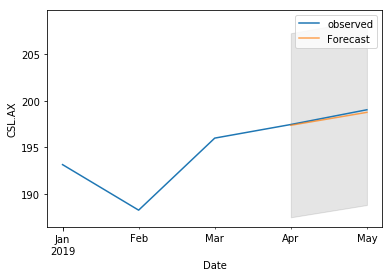

In [10]:
import datetime
import pandas_datareader.data as web
from sarimaxModel import sarimaxPrdict
from sarimaxModel import quickParameters
from sarimaxModel import selectParameters
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
months=12
end = datetime.date.today()
day=end.day
year=end.year-months//12-1
month=months%12+1
start=datetime.datetime(year,month,day)
ticker='CSL.AX'
y=web.DataReader(ticker,"yahoo",start,end)['Adj Close']   
y=y['2019-01-01':]
y=y.resample('MS').mean()
path='/Users/pengwang/PycharmProjects/JanePython/'
paramPath=path+'parameters.csv'
#parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
parameters=selectParameters(ticker,y,steps=2,disp=True)
#parameters=[ticker, 1, 0, 1, 1, 0, 0, 12, 'ct', 93.64345367611821, 0.004347129789365355]

#parameters=['MFG.AX', 0, 0, 1, 0, 1, 0, 12, 'n', 321.3071720270583, 0.486377988114156]


In [14]:
import statsmodels.api as sm
import os
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error
steps=3
train_y, test_y = y[:-steps], y[-steps:]
p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
model = SARIMAX(train_y,
     order=p1,
     seasonal_order=p2,
     trend=t,
     enforce_stationarity=False,
     enforce_invertibility=False)

model_fit = model.fit(disp=False)

forcast=model_fit.forecast(steps=len(test_y))
if True:  
        pred_ci=pd.DataFrame(index=forcast.index)
        pred_ci['low'] = forcast-forcast*0.05
        pred_ci['upper'] = forcast+forcast*0.05
        
     
        #pred_ci.loc[y.index[-1]]=[y[-1],y[-1]]
        #pred_ci=pred_ci.sort_index()
        ax = y['2019-01-01':].plot(label='observed')
        forcast.plot(ax=ax, label='Forecast', alpha=.7)
        
        ax.fill_between(forcast.index,
                        pred_ci.iloc[:,0],
                        pred_ci.iloc[:,1], color='k', alpha=.1)
        
        ax.set_xlabel('Date')
        ax.set_ylabel(ticker)
        plt.legend()
        
        plt.show()


LinAlgError: Non-positive-definite forecast error covariance matrix encountered at period 1

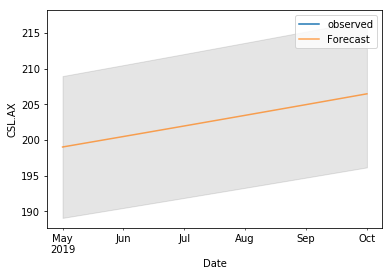

In [15]:

if( len(parameters)>0):
    
    p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
    result=sarimaxPrdict(ticker,y,p1,p2,t,steps=5,disp=True,days=20)
else:
    print("wrong parameters",len(parameters))

In [16]:
result

2019-05-01    199.026362
2019-06-01    200.496782
2019-07-01    201.978066
2019-08-01    203.470293
2019-09-01    204.973546
2019-10-01    206.487904
dtype: float64